# Assignment 1: My Heart Will Go On (but not yours?!?)

Today's assignment was inspired by a student's question, wondering if network analysis could be applied to the Titanic dataset. Instead of using the somewhat tragic dataset about surviving or perishing in the Titanic disaster, we will focus on the events leading up to it and try to solve the mystery behind why Rose didn't help Jack from dying.

<img title='Titanic' style="float: right;" src='https://www.firstforwomen.com/wp-content/uploads/sites/2/2024/09/kate-winslet-titanic.jpg?w=953&quality=86&strip=all' width="700">

We will use **James Cameron’s** 1997 film [Titanic](https://www.imdb.com/title/tt0120338/), starring Leonardo DiCaprio (as Jack) and Kate Winslet (as Rose). The film is based on a partly true story, though with a few inaccuracies.

One example is [Violet Jessop](https://www.youtube.com/watch?v=ERDHDAR3ZsU&ab_channel=titanicstories), a woman who survived the RMS Olympic (1911), RMS Titanic (1912), and later the HMHS Britannic (1916), which sank after hitting a German naval mine. In the film, she was depicted as an elderly Third-Class stewardess, instead of a First-Class stewardess who was about 24 years old.


### Dataset
Dataset consists of two files: **edges.csv** & **nodes.csv**. The names of the file should be selfexpenatory. Data was constructed from film's script, published [here](https://imsdb.com/scripts/Titanic.html), and present the coocurence of the characters in each scene. Both files are in the github repository of the assigment.  

In **edges.csv** the Weight column presents the number of coocurences for characters, and should be used in the assigment. 

## Instructions:

Follow all 4 objectives. For each objective, calculate and/or visualize the results, and provide explanations of **WHAT** you used to accomplish the task, **WHY** you chose that approach, and most importantly, your **understanding of the results**. **LET'S HYPOTHESIZE** that Rose could have saved Jack, so at the end, provide your reasoning as to why she didn't save him (there’s no right answer to this :)).

You can simply rename this file and submit it. If you'd like, you can also create a video presentation. Making a video is a great exercise for students who are struggling with oral exams.

Over the weekend, I will review the submissions, and at the beginning of next week, I will schedule a Teams meeting where we will slowly go through the objectives together.

HINT: Use Networx documentation!



## Objectives:
The primary objective is to construct a visual representation of a graph, representing the relationships and interactions among the characters in the Titanic dataset.

In [1]:
# Basic Imports with aliases
import numpy as np 
import matplotlib.pyplot as plt
import csv
import networkx as nx
from networkx.algorithms import community
from collections import deque
import pandas as pd
import time
import random

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
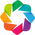

In [2]:
# Preparation for visualisation with HoloView with Bokeh backend
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

### Data import and inspection

In [3]:
# Data import
# adjusted for the location of data on my local computer
edges = pd.read_csv("data/edges.csv") 
nodes = pd.read_csv("data/nodes.csv")

In [4]:
nodes.head()

,Id,Label,Gender,movie_id,componentnumber,modularity_class
0,5097316,ROSE,F,828,0,0
1,5098095,JACK,M,828,0,3
2,5097875,CAL,M,828,0,5
3,5098619,MOLLY,F,828,0,4
4,5098545,SMITH,M,828,0,2


In [5]:
edges.head()

,Source,Target,Type,Id,Label,Weight,movie_id
0,5096932,5096969,Undirected,679,181587,1,828
1,5098606,5103789,Undirected,680,182039,1,828
2,5098606,5098095,Undirected,681,182094,1,828
3,5098606,5101061,Undirected,682,182036,1,828
4,5098606,5097941,Undirected,683,182037,1,828


### 1. Graph Construction

#### Graph Construction
In our graphical illustration:
- **Nodes** represent individual *characters* in the movie (I used label and gender))
- **Edges** indicate the presence of a *shared scene* between two characters 
- **Edge weights** reflect the *frequency* of these shared scenes (I used weight from data)

In [6]:
G = nx.Graph()
for index, row in nodes.iterrows():
    G.add_node(row['Id'],
               label = row['Label'],
               gender = row['Gender'])
    
for index, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

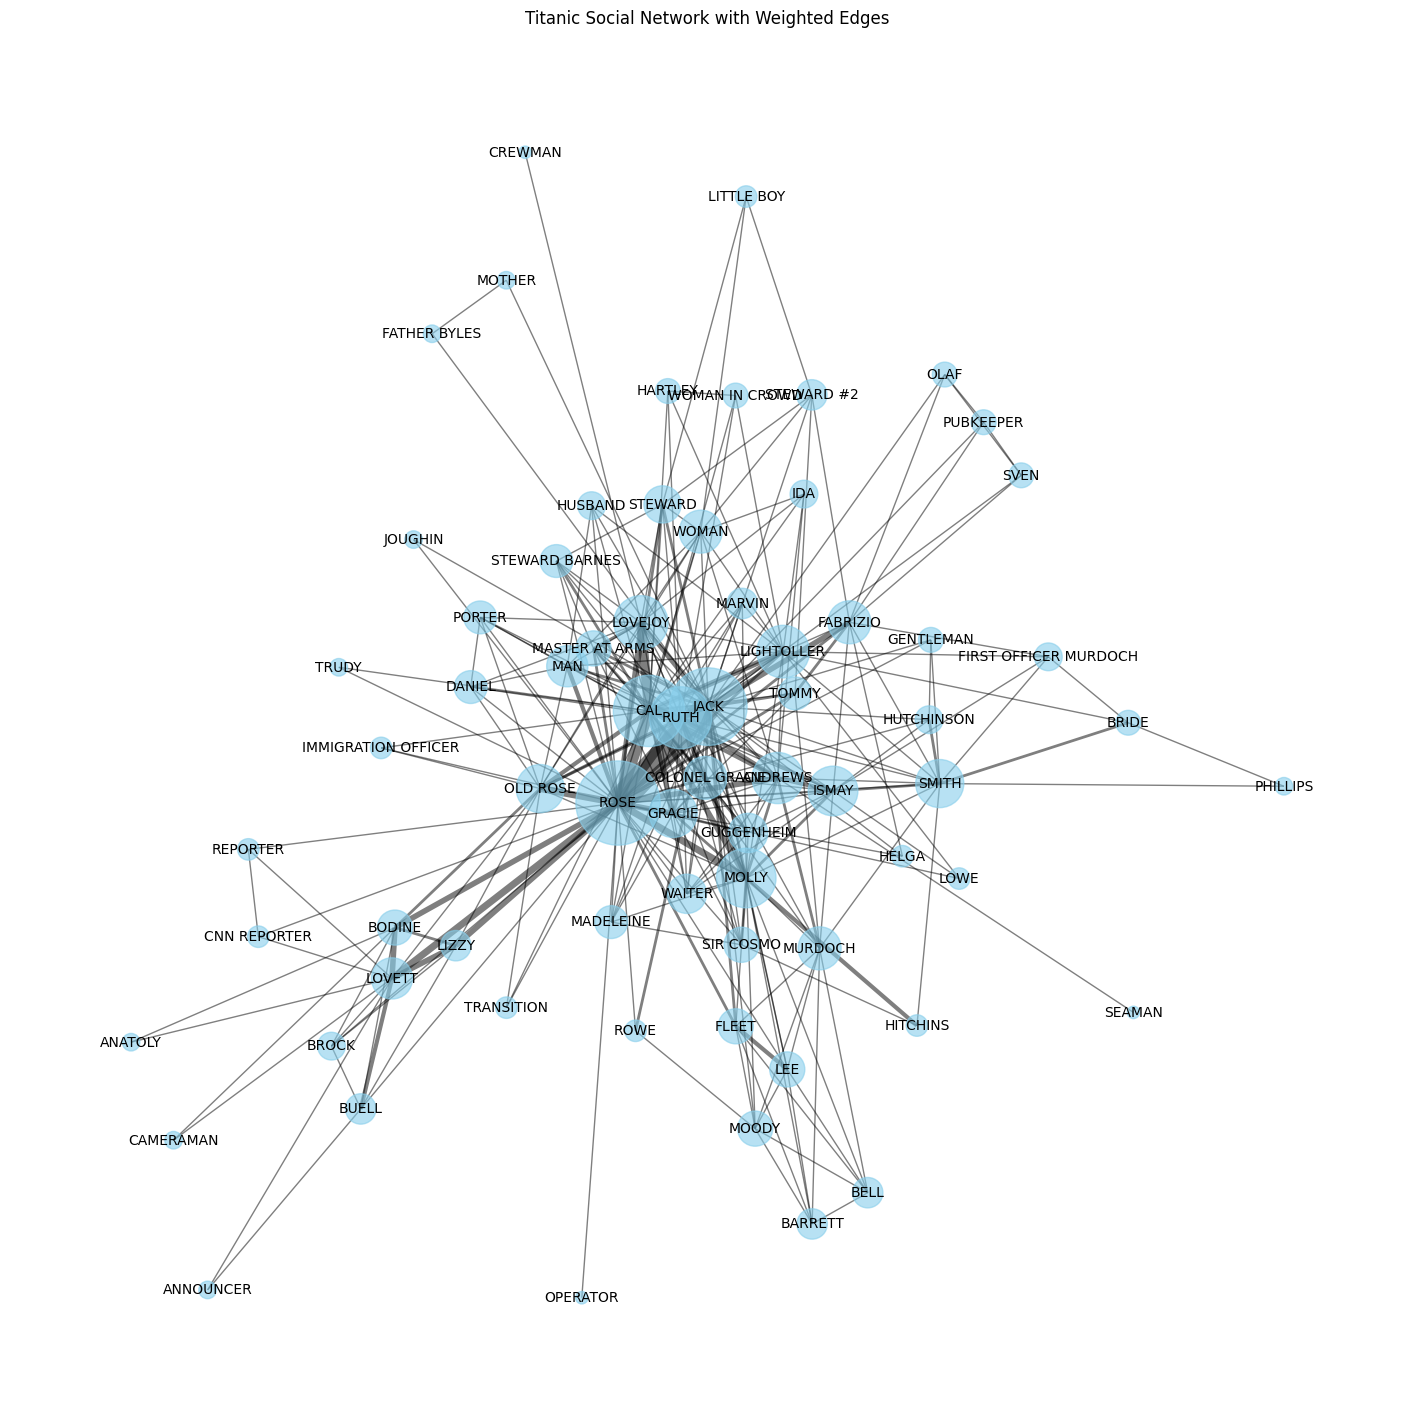

In [7]:
# Setting up the plot dimensions
plt.figure(figsize=(18, 18))

# Use the spring layout algorithm for positioning the nodes
pos = nx.spring_layout(G)

# Adjust node sizes based on their degrees
node_sizes = [v * 80 for v in dict(G.degree()).values()]

# Adjust edge widths based on their weights
edge_widths = [d['weight'] for _, _, d in G.edges(data=True)]

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=10)

plt.title("Titanic Social Network with Weighted Edges")
plt.axis("off")
plt.show()

### 2. Graph Analysis
Determinate the basic graph indicators:
**Total number of nodes and edges**: to understand the *scale and complexity* of the graph
**Average degree**: giving an average of *connections per node*
**Graph density**:  providing an insight into the *overall connectivity*

In [8]:
#number of nodes
print("Number of nodes: ", G.number_of_nodes())

#number of edges
print("Number of edges: ", G.number_of_edges())

#average degree
print("Average degree: ", np.mean([d for n, d in G.degree()]))

#density
print("Density: ", nx.density(G))


Number of nodes:  70
Number of edges:  299
Average degree:  8.542857142857143
Density:  0.12380952380952381


Our graph has 70 nodes and 299 edges, so 70 different characters and 299 different shared scenes between two different character pairs

**Average degree** of the network is 8.5 which means that in average each node has 8.5 connections.
This means that in average each character would share  8.5 times with other actors in the movie.

**Density** of the graph is 0.12 which means graph is relatively *sparse*, meaning that there are a lot of nodes with fewer connections than other nodes in our network. This is expected in the movies as there are main characters with lots of connections but also characters that don't have a lot of connections with other actors in the movie.




### 3. Node analysis
Calculate basic centralities and compare the most central characters.

In [9]:
cent_degree = dict(nx.degree(G))
cent_eigen = dict(nx.eigenvector_centrality(G))
cent_between = dict(nx.betweenness_centrality(G))

In [10]:
nx.set_node_attributes(G, cent_eigen, 'cent_eigen')
nx.set_node_attributes(G, cent_degree, 'cent_degree')
nx.set_node_attributes(G, cent_between, 'cent_between')

In [11]:
table_data = {
    'label': nx.get_node_attributes(G, 'label'),
    'gender': nx.get_node_attributes(G, 'gender'),
    'cent_eigen': nx.get_node_attributes(G, 'cent_eigen'),
    'cent_degree': nx.get_node_attributes(G, 'cent_degree'),
    'cent_between': nx.get_node_attributes(G, 'cent_between')
}

# Convert the data to a DataFrame
table_cent = pd.DataFrame(table_data)

# Sort by degree centrality in descending order
table_cent_sorted = table_cent.sort_values(by='cent_degree', ascending=False)

In [12]:
table_cent_sorted.head(7)

,label,gender,cent_eigen,cent_degree,cent_between
5097316,ROSE,F,0.340877,46,0.382931
5098095,JACK,M,0.315453,39,0.218468
5097875,CAL,M,0.303755,33,0.089469
5097894,RUTH,F,0.266940,25,0.037141
5098619,MOLLY,F,0.232620,23,0.057112
5097941,LOVEJOY,M,0.206246,19,0.043238
5101061,LIGHTOLLER,M,0.180988,18,0.048164


#### Visualisation with HoloView (example with Degree centrality)

In [13]:
weights = [G[u][v].get('weight', 1) for u, v in G.edges()]

# Step 2: Normalize the weights for edge_alpha between 0.1 and 1.0
max_weight = max(weights)
min_weight = min(weights)

def normalize_weight(weight, min_w, max_w):
    return 0.1 + (weight - min_w) / (max_w - min_w) * 0.9

# Calculate edge_alpha using normalized weights
edge_alpha = [normalize_weight(G[u][v].get('weight', 1), min_weight, max_weight) for u, v in G.edges()]

# Step 3: Add 'edge_alpha' as an edge attribute
for i, (u, v) in enumerate(G.edges()):
    G[u][v]['edge_alpha'] = edge_alpha[i]



In [14]:
for node, attributes in G.nodes(data=True):
    if attributes.get('cent_degree', 0) <= 5:
        G.nodes[node]['label'] = ''  # Empty label for nodes with 'cent_degree' <= 5
    # If 'cent_degree' > 5, the label is already set (from previous steps)

In [15]:
G_layout = nx.layout.kamada_kawai_layout(G)

In [16]:
g_plot = hv.Graph.from_networkx(G, G_layout).opts(
    tools=['hover'],
    directed=False,
    edge_alpha='edge_alpha',  # Use edge_alpha from the edge attribute
    node_size='cent_degree',  # Use 'cent_degree' for node size
    node_color='gender',
    cmap = ['blue','red'],
    legend_position='right'
)

In [17]:
show(hv.render(g_plot))

Graph shows the most central nodes with degree centrality by gender. We can observe that there is only a few female characters with notable size of degree centrality.

**Degree centrality** tell us the number of connections of the nodes. In our example this means how many times character shared scene with other actors in the movie. So, more important character (main characters) would appear often and with many other characters. 

### 4. Node attributes
Add Gender attribute (from dataset to the network) and calculate and/or visualize the share of females and males characters in the film. Furthermore, subgraph network to only male characters. Who are the main characters, what is their relationship?



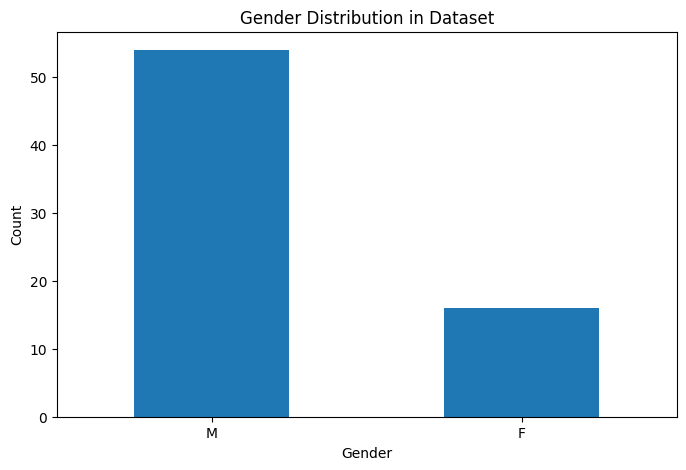

In [18]:
gender_counts = nodes['Gender'].value_counts()

# Plotting the gender distribution
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar')
plt.title('Gender Distribution in Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

We can observe that there is majority of male characters. 

In [19]:
# Sub graph to Males
male_nodes = [n for n, attr in G.nodes(data=True) if attr.get('gender') == 'M']
G_males = G.subgraph(male_nodes).copy()

In [20]:
#number of nodes
print("Number of nodes: ", G_males.number_of_nodes())

#number of edges
print("Number of edges: ", G_males.number_of_edges())

#average degree
print("Average degree: ", np.mean([d for n, d in G_males.degree()]))

#density
print("Density: ", nx.density(G_males))

Number of nodes:  54
Number of edges:  156
Average degree:  5.777777777777778
Density:  0.1090146750524109


We can observe that compared to the whole dataset, the males have lower average centrality (fewer connections) and lower density. The later is understandable as we removed characters that could be adjacent to male characters. 

In [21]:
G_layout = nx.layout.kamada_kawai_layout(G_males)

In [22]:
g_plot_males = hv.Graph.from_networkx(G_males, G_layout).opts(
    tools=['hover'],
    directed=False,
    edge_alpha='edge_alpha',  # Use edge_alpha from the edge attribute
    node_size='cent_degree',  # Use 'cent_degree' for node size
    node_color='gender',
    cmap = ['blue','red'],
    legend_position='right'
)

In [23]:
show(hv.render(g_plot_males))

### Community detection and visualization

In [24]:
import community.community_louvain as community_louvain

In [25]:
G = nx.Graph()
for index, row in nodes.iterrows():
    G.add_node(row['Id'],
               label = row['Label'],
               gender = row['Gender'],
               cent_degree = G.degree())
    
for index, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

nx.set_node_attributes(G, cent_degree, 'cent_degree')

In [26]:
# Compute Average Clustering
avg_clustering = nx.average_clustering(G)

# Compute Transitivity
transitivity = nx.transitivity(G)

print("Average Clustering:", avg_clustering)
print("Transitivity:", transitivity)

Average Clustering: 0.74365514867621
Transitivity: 0.39350485027414595


In [27]:
com = community_louvain.best_partition(G)

In [28]:
nx.set_node_attributes(G, com, 'community')


In [29]:
distinct_count = len(set(com.values()))
print(distinct_count)

5


We detected 5 different communities in the dataset. 

In [30]:
nodes_df = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')


In [31]:
nodes_df.head()

,label,gender,cent_degree,community
5097316,ROSE,F,46,4
5098095,JACK,M,39,4
5097875,CAL,M,33,1
5098619,MOLLY,F,23,2
5098545,SMITH,M,15,3


In [32]:
top_5_per_community = nodes_df.groupby('community')['cent_degree'].nlargest(5).reset_index()

# Merge with the 'label' column to include the labels for each ID
top_5_with_labels = top_5_per_community.merge(nodes_df[['label']], left_on='level_1', right_index=True)

# Display the result
print(top_5_with_labels)

    community  level_1  cent_degree                  label
0           0  5096969           11                 LOVETT
1           0  5096948            8                 BODINE
2           0  5097212            6                  BUELL
3           0  5097505            6                  LIZZY
4           0  5099349            5                  BROCK
5           1  5097875           33                    CAL
6           1  5097894           25                   RUTH
7           1  5097941           19                LOVEJOY
8           1  5101061           18             LIGHTOLLER
9           1  5098606           17                ANDREWS
10          2  5098619           23                  MOLLY
11          2  5101981           12                MURDOCH
12          2  5101285            8                  FLEET
13          2  5101840            8                    LEE
14          2  5100235            8              SIR COSMO
15          3  5098545           15                  SMI

In [33]:
nx.set_node_attributes(G, com, 'community')
G_layout = nx.layout.kamada_kawai_layout(G)
g_plot = hv.Graph.from_networkx(G, G_layout).opts(tools=['hover'],
                                                  node_size='cent_degree',
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

Final visualisation shows communities of characters in dataset. We can observe that Rose and Jack appears together, Cal (Rose's fiance is in different one)

## FINAL ANSWER AND ARGUMENTATION

In this assignment we analyzed characters in the movie Titanic. We found main characters (Rose, Jack, and Cal). We could also observe that there are more male characters in the movie. Combining other sources (movie), we can see that Rose and Cal are in the first class and Jack only in the third. Cal is rich, yet his much younger fiance (17 years old) started a romance with Jack (who saved her life before the ship sunk). 

After the exident, Rose was floating on a "relatively" large peace of wooden doors. She found Jack swimming. She decided not to save him. WHY? My answer is in the video bellow!



<video width="560" height="315" controls>
  <source src="https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/dcc3c060-f135-4e80-8d32-187b62ea397f/transcode=true,original=true,quality=90/35671529.webm" type="video/mp4">
  Your browser does not support the video tag.
</video>
